2GZAV - SEMESTRÁLNÍ PROJEKT - Velčovský (2025) - 03 Aplikace malířských stylů OpenCV

In [42]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

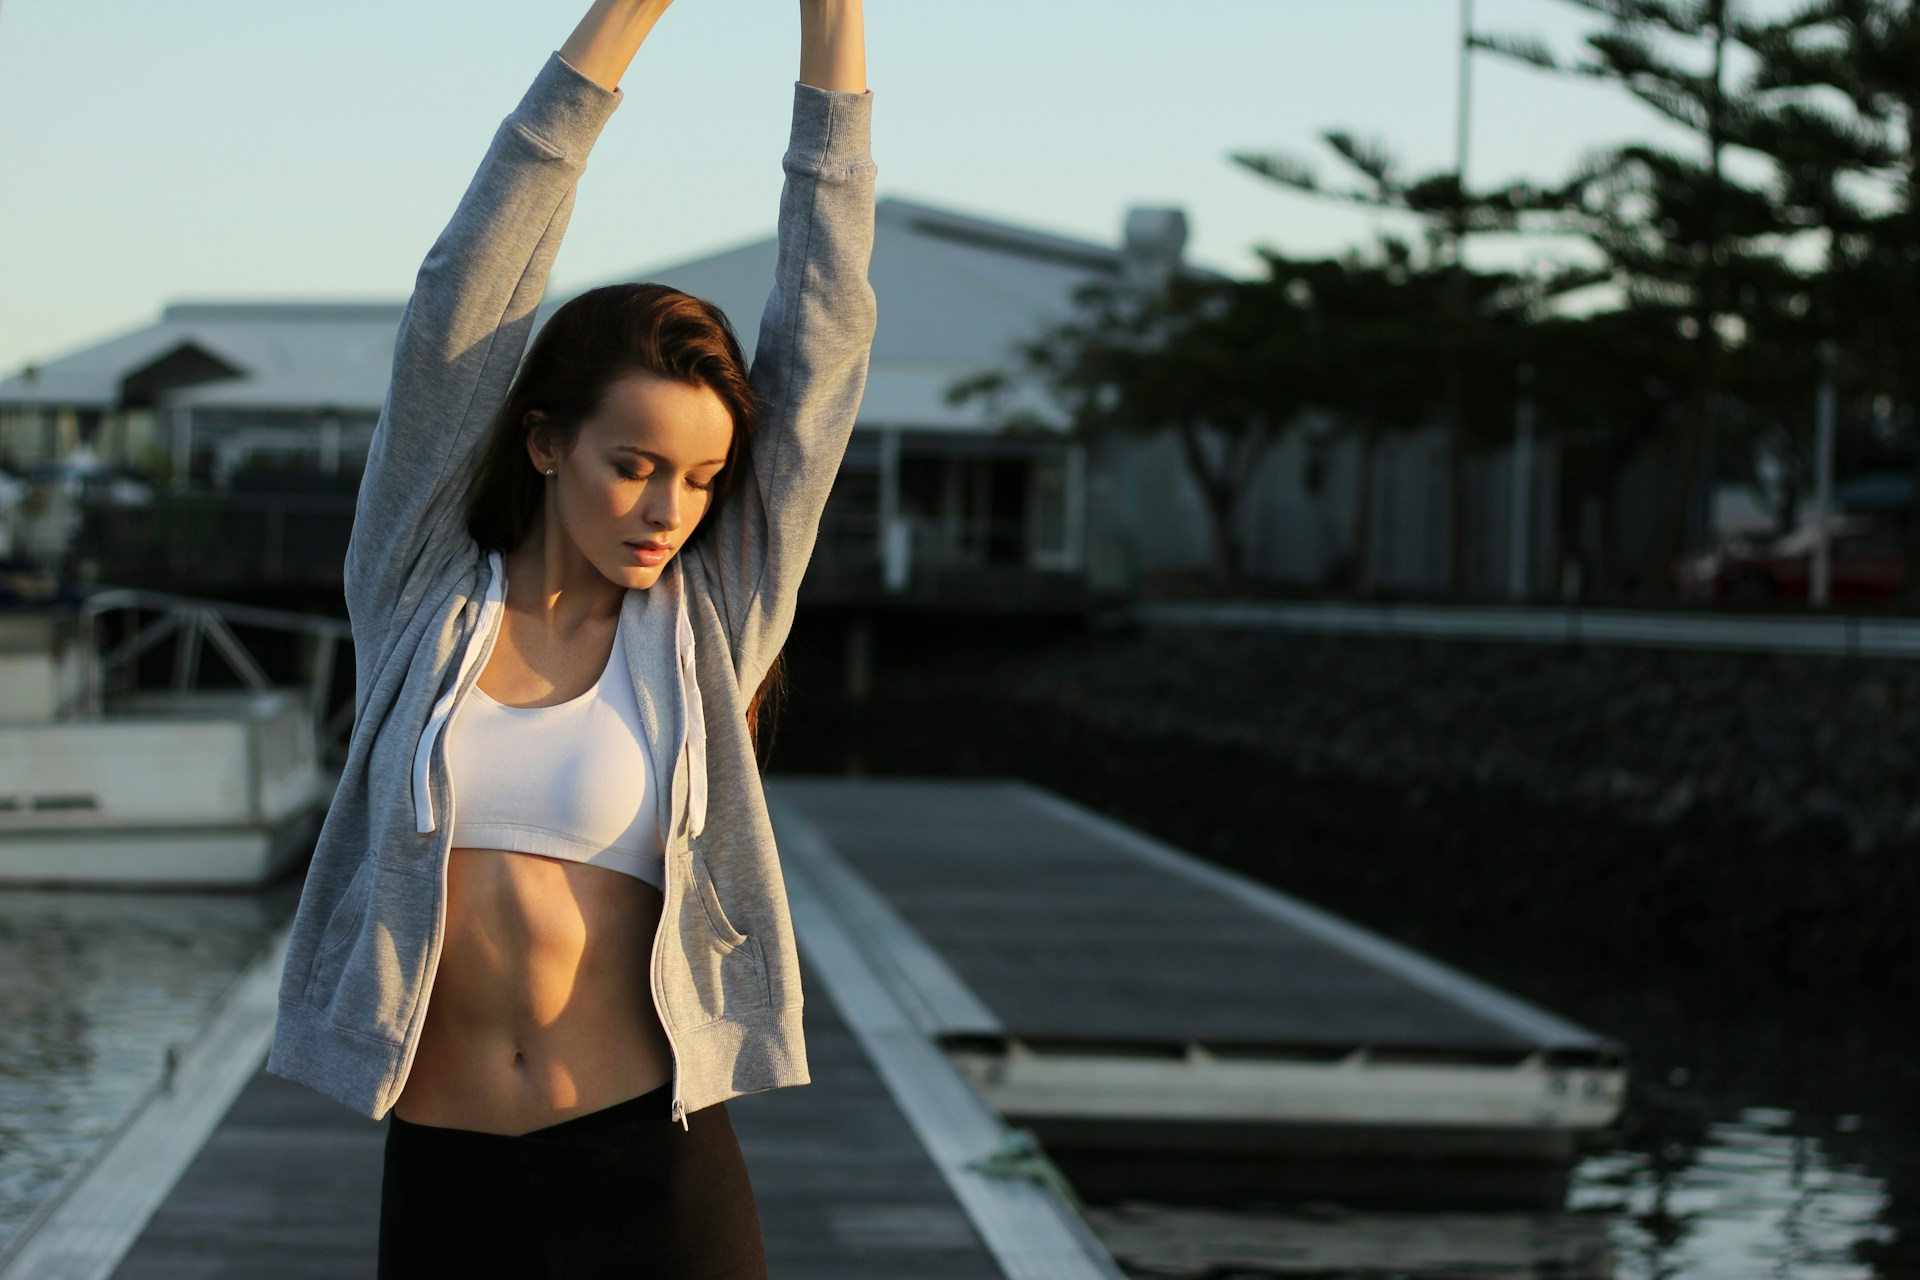

In [49]:
# Display pixel image.
Image(filename="./resources/unsplash-girl.jpg")

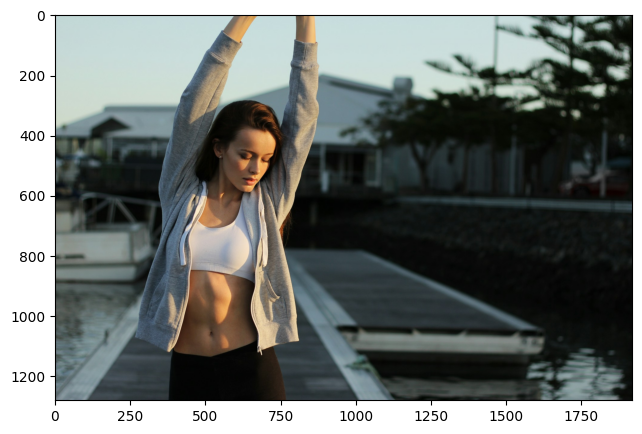

In [138]:
fig = plt.figure(figsize=(17, 5))

girl_img = cv2.imread("./resources/unsplash-girl.jpg", 1)
girl_img_channels_reversed = girl_img[:, :, ::-1]
plt.imshow(girl_img_channels_reversed)

plt.show()

Apply paint style to the image

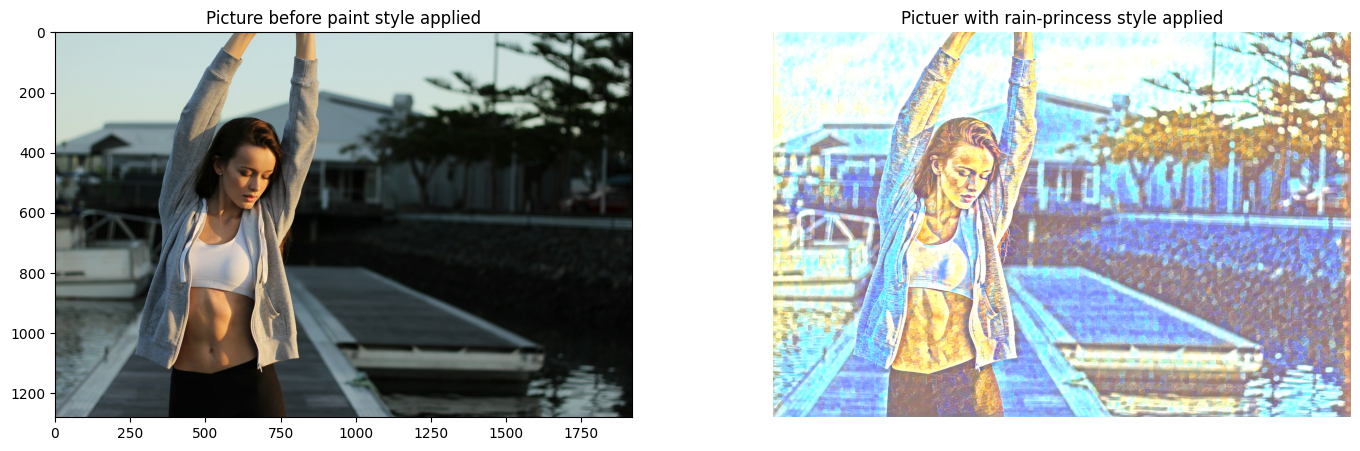

Stylized image saved to c:\Users\petav\VisualCode-work\_PYTHON\projekt\outputs\03_paint_style-rain-princess_output.jpg


In [142]:
fig = plt.figure(figsize=(17, 5))	

def paint_styles(image, styleName):

    # print out initial image
    plt.subplot(121)	
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Picture before paint style applied")

    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1.0, (w, h),(103.939, 116.779, 123.680), swapRB=False, crop=False)

    # Načti model a proveď inferenci
    model_path = get_model_path(styleName)
    net = cv2.dnn.readNetFromONNX(model_path)
    net.setInput(blob)
    output = net.forward()
    output = output.squeeze().transpose((1, 2, 0))
    output += np.array([103.939, 116.779, 123.680])
    output = np.clip(output, 0, 255).astype(np.uint8)
    output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    plt.subplot(122)	
    plt.imshow(output)
    plt.title(f"Pictuer with {styleName} style applied")
    plt.axis('off')
    plt.show()

    # save picture after median blur
    cv2.imwrite(f'./outputs/03_paint_style-{styleName}_output.jpg', cv2.cvtColor(output, cv2.COLOR_RGB2BGR))
    print(f"Stylized image saved to {os.path.abspath(f'./outputs/03_paint_style-{styleName}_output.jpg')}")

def get_model_path(styleName):
    styles = {
        "mosaic": "./models/weights/mosaic.onnx",
        "candy": "./models/weights/candy.onnx",
        "rain-princess": "./models/weights/rain-princess.onnx",
        "udnie": "./models/weights/udnie.onnx"
    }
    return styles.get(styleName, None)

paint_styles(girl_img, 'rain-princess')

# mosaic, candy, udnie, rain-princess